<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#복습" data-toc-modified-id="복습-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>복습</a></span></li><li><span><a href="#optimizer" data-toc-modified-id="optimizer-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>optimizer</a></span></li><li><span><a href="#텍스트-분류" data-toc-modified-id="텍스트-분류-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>텍스트 분류</a></span></li><li><span><a href="#Transfer-Learning-with-CNN" data-toc-modified-id="Transfer-Learning-with-CNN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transfer Learning with CNN</a></span></li></ul></div>


# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/ai_lecture_fundamental](https://github.com/realblack0/ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## 복습

뼈대를 만드는 방법은 총 3가지 있었다.  
뼈대를 만드는 클래스는 2가지이다. 

In [1]:
from tensorflow.keras.models import Sequential, Model

Dense는 fully-connected layer를 구현한 이론 layer이다.

In [2]:
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential([
    Dense(16, input_shape=(28*28,)), # 2의 배수를 쓰면 병렬처리할 때 유리해서 관례상 사용함
    Dense(10, activation="softmax")
])

summary에서 보이는 Param은 weight와 bias를 합친 것이다.  
Parameter가 너무 많으면 overfitting 위험이 있다.
- Param : weight + bias → 학습해야할 대상   


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


classification, regression 문제인 경우에는 loss function에 대하여 많이 연구되었기에 관례적으로 쓰는 것이 있다.  
새로운 문제, 특정한 데이터에 맞춤형 문제인 경우에는 loss function을 새로 만들어야 한다.  
loss function을 만들려면 수학이 필요하다.

entropy는 정보이론에서 나온 개념으로, 간단히 이해하자면 작으면 작을수록 좋다.

optimizer는 보통 adam을 사용한다. activation function을 relu로 사용하는 것과 마찬가지로 보편적으로 사용된다.
- adam, relu -> 빠르진 않지만 학습이 된다는 보장이 어느정도 있음

In [31]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

학습할 때는 `fit`메소드르 사용한다.  
`fit`은 return 값이 있는데, 학습의 중간 결과를 담고 있다. → learning curve를 그릴 수 있다.

In [ ]:
result = model.fit()

## optimizer

딥러닝은 미분으로 기울기를 구해서 parameter를 업데이트한다.  
오차(loss)가 가장 작은 지점(global minimum)의 기울기는 0이다.  
그러나 local minima(국소 최소점)와 saddle point(안장점)도 기울기가 0이라서 학습이 최적해를 찾지 못하는 경우도 있다.

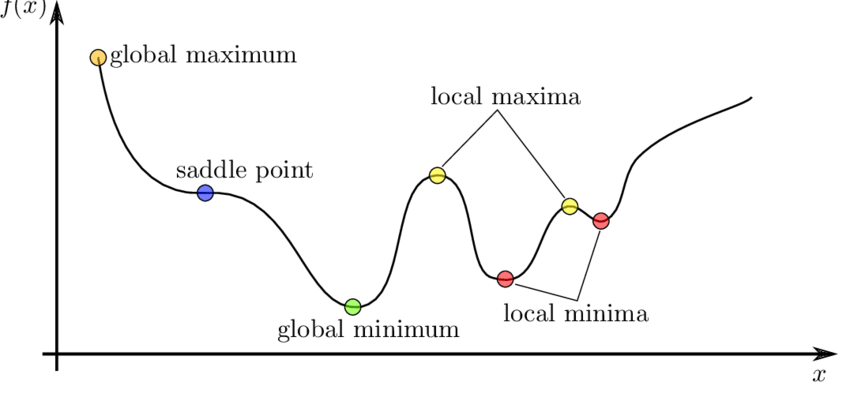

현재는 데이터가 많으면 local minima와 saddle point에 안 빠진다는 것이 경험적으로 알려졌다.  
예전에는 이것들을 피하는 것이 중요하다고 생각해서 연구가 많이 되었다. 

잘 알려진 optimizer는 다음 자료에 잘 설명되어 있으니 참고.


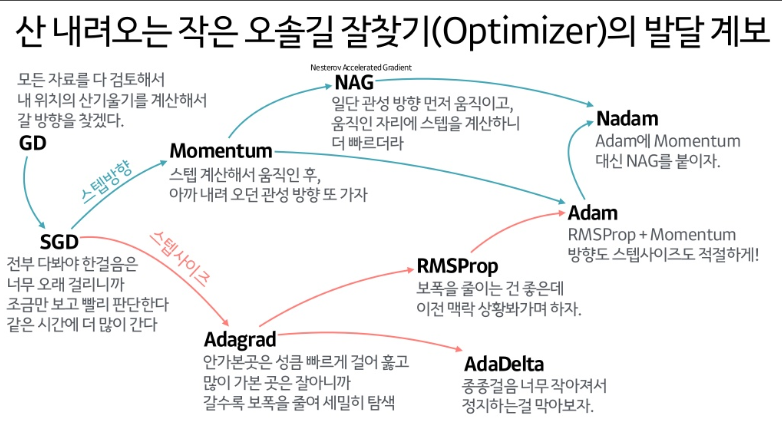
출처 https://www.slideshare.net/yongho/ss-79607172

**기똥찬 사이트 모음**

1. [optimizer-visualization](https://github.com/Jaewan-Yun/optimizer-visualization)
    - 각 optimizer가 최적해를 찾아가는 과정을 gif로 시각화하였다.  

2. [Interactive Visualization of Optimization Algorithms in Deep Learning](https://emiliendupont.github.io/2018/01/24/optimization-visualization/)
    - 마우스로 클릭한 지점으로부터 각 optimizer가 최적해를 찾아가는 과정을 시각화하였다.

3. [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)
    - optimizer를 모아놓은 사이트를 소개한다. 전세계 사람들이 모두 이 사이트를 참고하고 있으며, 지속적으로 업데이트 중이다.  
    - [한국어 번역](https://brunch.co.kr/@chris-song/50)


optimizer는 아주 어려운 분야이다. 딥러닝 중에서도 이것만 연구하는 분들이 있다.  
24개 정도 알려져있다.  
보통은 연구자들이 만들어놓은 것 가져다 쓴다.  

## 텍스트 분류

※ 이번 수업은 tensorflow 공식문서 [영화 리뷰를 사용한 텍스트 분류](https://www.tensorflow.org/tutorials/keras/text_classification?hl=ko)를 참조하였습니다.

tutorial에 있는 코드를 그대로 실행하면 문제가 생길 수 있으니 조심해야 한다.  


tutorial에 있는 코드 중에서
```python
!pip install -q tf-nightly-2.0-preview
```
이 코드를 그대로 실행하면 tensorflow 버전이 바뀌므로 조심해야한다. 이 라인을 제외하고 실행하자.  
※ 참고: nightly는 정식 공개 전 최신 버전 / 실험적인 기능 추가됨  

tutorial에 있는 다른 코드
```python
from __future__ import absolute_import, division, print_function, unicode_literals
```
이 코드는 python2와 python3의 호환을 위한 기능을 임포트하는 것이다.  
우리는 python3를 사용하고 있으므로 실행할 필요가 없다.

In [34]:
# from __future__ import absolute_import, division, print_function, unicode_literals

# !pip install -q tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.0.0


imdb는 영화 리뷰 데이터셋이다.  
`load_data`의 파라미터 `num_words`는 리뷰에 사용된 단어 개수를 의미한다.  
데이터가 너무 크기 때문에 연습용으로 데이터 크기를 줄인다.

In [8]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

X_train은 array 안에 list로 되어 있다.

In [14]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

학습용 리뷰데이터는 총 25000개이다.

In [10]:
X_train.shape

(25000,)

리뷰마다 문장의 길이가 다르다.  
기계학습하려면 shape이 맞아야한다.  

전통적인 기법으로는 길이가 가장 긴 리뷰를 기준으로, 길이가 모자란 리뷰에 0을 채워준다.  
이 기법을 zero padding이라고 한다.  
  
자연어처리는 zero padding 외에도 shape을 맞추는 다양한 기법을 배운다.  
자연어 데이터는 거의 항상 모양이 일정하지 않아서 이런 이슈가 많다.  

In [12]:
len(X_train[0])

218

In [13]:
# 길이 다름
len(X_train[1])

189

리뷰데이터의 숫자들은 리뷰에 사용된 단어를 숫자로 바꾼 것이다.  
`get_word_index`는 숫자와 원래 단어가 어떻게 매칭되는지 알려준다.

In [35]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

출력 중략...

dictionary를 for문에 사용하는 방법은 3가지가 있었다. `dict.keys()`, `dict.values()`, `dict.items()`  
for에 그냥 쓰면 `keys`와 같다.

In [36]:
for _, i in enumerate(imdb.get_word_index()):
    print(i)
    
    if _ == 20:
        break # 단어가 너무 많아서 20개만 확인

fawn
tsukino
nunnery
sonja
vani
woods
spiders
hanging
woody
trawling
hold's
comically
localized
disobeying
'royale
harpo's
canet
aileen
acurately
diplomat's
rickman


In [37]:
# items는 (key, value)로 된 tuple를 반환
for _, i in enumerate(imdb.get_word_index().items()):
    print(i)
    if _ == 20:
        break # 단어가 너무 많아서 20개만 확인

('fawn', 34701)
('tsukino', 52006)
('nunnery', 52007)
('sonja', 16816)
('vani', 63951)
('woods', 1408)
('spiders', 16115)
('hanging', 2345)
('woody', 2289)
('trawling', 52008)
("hold's", 52009)
('comically', 11307)
('localized', 40830)
('disobeying', 30568)
("'royale", 52010)
("harpo's", 40831)
('canet', 52011)
('aileen', 19313)
('acurately', 52012)
("diplomat's", 52013)
('rickman', 25242)


딥러닝에 사용할 수 있게 shape을 맞추기 위해서 `pad_sequence`로 zero padding한다.

In [40]:
train_data = keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=0,        # 0으로 채운다.
                                                        padding='post', # 문장 뒤에 0을 채운다.
                                                        maxlen=256)     # 256(가장 긴 문장의 길이)을 기준으로 0을 채운다.

test_data = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=0,
                                                       padding='post',
                                                       maxlen=256)

tutorial 코드에서 모델 만들 때 사용된 `Enbedding`은 자연어 특징에 관련한 특징을 추출하는 레이어이다.  
학습을 통해서 데이터의 특징(feature)을 찾는 것이 딥러닝이 머신러닝과 다른 차별점이다. 

자연어처리에서는 데이터 전처리 단계에서 어휘 사전이라는 것을 만든다.  
자연어로 된 raw data에서 학습에 사용할 단어만 추린 것이다. 위의 `get_word_index`같이 만든다.

imdb 데이터의 label은 긍정/부정으로 binary 분류이다.  
output layer에 노드 수는 1, 활성함수는 sigmoid를 썼다.

In [41]:
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다(10,000개의 단어)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


이후에 학습 및 결과 확인은 공식문서를 참조하자.

여기서 우리가 배워야할 내용:
- 딥러닝은 데이터 전처리가 필요없다.
    - 모델이 학습해서 데이터에서 특징을 추출한다.
    - 기계학습에서는 사람이 직접 전처리해서 데이터의 특징을 추출했다.
- 도메인 별로 특징 추출하는 방법을 배워야한다.
    - 도메인에는 CV(Computer Vision), NLP(Natural Laguage Process), voice 등이 있다.

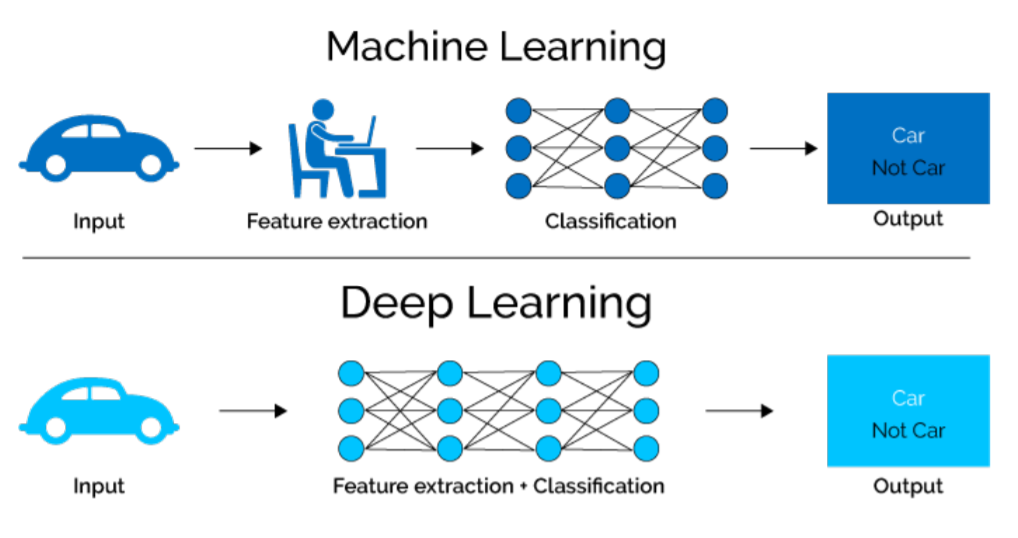

## Transfer Learning with CNN

※ 이번 수업은 tensorflow tutorial [Transfer learning with a pretrained ConvNet](https://www.tensorflow.org/tutorials/images/transfer_learning?hl=ko)을 참조하였습니다.  

이번 튜토리얼의 코드는 François Chollet(프랑스와 숄레, a.k.a. keras 창시자)가 만들었다.  
keras의 기능에 대해 설명하기 위한 코드이므로, 최적화된 코드는 아니다.

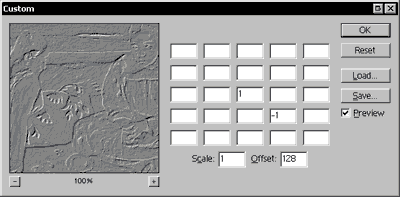
<center> ↑ 포토샵의 커스텀 필터 </center>

CNN(Convolutional Neural Network)이라는 이름은 convolution 연산을 하기 때문에 붙은 이름이다.  
  
쉽게 예를 들면, 포토샵의 커스텀 필터는 컨볼루션 연산이다.  
우측의 칸을 보면 행렬 같이 생긴 칸이 있다. 이 행렬을 filter(또는 kernel)라고 부른다.  
  
우리는 이미지는 행렬이라고 배웠다. 이미지와 filter를 컨볼루션하면 좌측과 같은 그림으로 변환된다. 이미지에서 어떤 특징이 추출된 모습이다.  
filter의 값을 어떻게 바꾸느냐에 따라서 filter는 이미지 고유의 특징을 뽑아낼 수 있다.(feature extraction)  
filter를 이용해서 우리가 흔히 아는 smoothing, sharp, embossing, blur 등의 이미지 처리가 가능하다.  
CNN은 이미지에 숨어있는 특징을 학습을 통해서 찾아낸다.

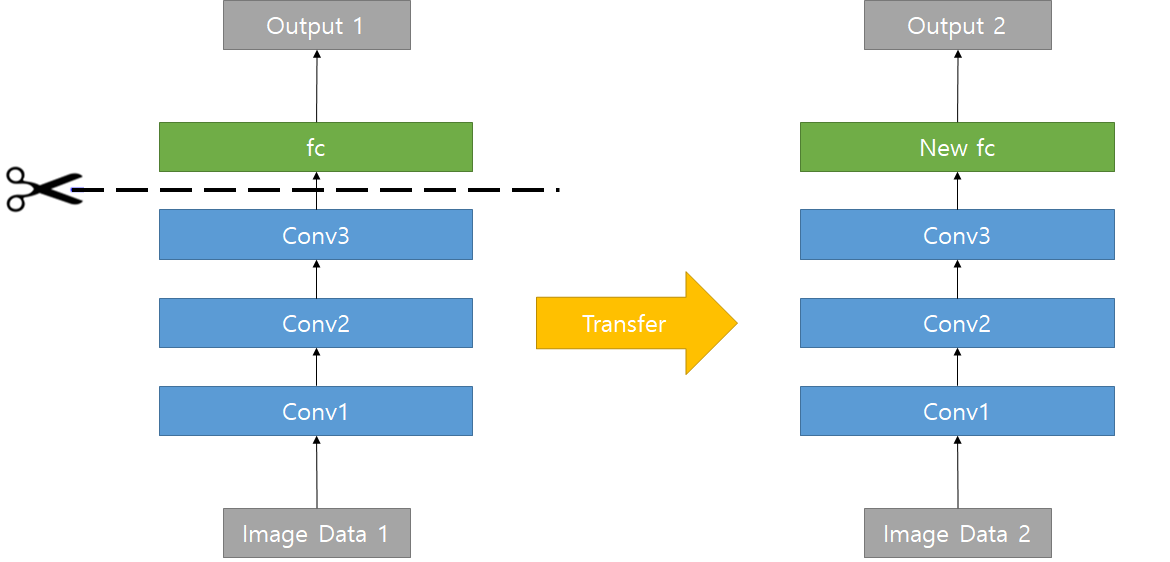

보통 CNN 모델은 Convolution layer를 여러겹 쌓고 그 위에 fully connected layer가 쌓인 형태로 생겼다.  
앞서 convolution으로 이미지의 특징을 추출할 수 있다고 언급했다. 위 그림에서 conv1 ~ conv3은 이미지의 특징을 추출하는 레이어이다.  
마지막 fc layer가 실질적으로 분류를 수행하는 레이어이다.  

모델이 잘 학습하였다면 Conv layer가 이미지의 특징을 잘 추출할 것이다.  
잘 학습된 모델의 conv layer만 가져오면 이미지의 특징을 추출하는 용도로 활용할 수 있다.  
실질적인 분류를 수행하는 fc 레이어만 새로 만들면 새로운 모델을 만들 수 있다.  
conv layer가 이미지의 특징을 잘 추출하기 때문에, 새로 만든 fc layer는 학습하기가 더 수월하다.  
이것이 transfer learning의 원리이다.  
일반적으로 성능도 더 좋고, 학습 속도도 빠르다.

In [22]:
import tensorflow as tf

`disable_progress_bar`는 데이터셋을 다운로드 받을때 컬러풀하게 progressbar를 표시해준다.  
구글 개발자는 공돌이 감성이라 이 기능을 disable 시켰다.

In [20]:
import tensorflow_datasets as tfds
# tfds.disable_progress_bar()

개와 고양이를 분류하는 데이터셋을 가져온다.

In [59]:
# 처음 실행하면 progressbar가 나온다. 

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=[
       tfds.Split.TRAIN.subsplit(tfds.percent[:80]),
       tfds.Split.TRAIN.subsplit(tfds.percent[80:90]),
       tfds.Split.TRAIN.subsplit(tfds.percent[90:])
    ],
    with_info=True,
    as_supervised=True,
)

데이터셋은 tensor로 되어있다.  
구글이 제공하는 데이터셋이므로 tensorflow에서만 쓸 수 있게 하려는 것이다.  
`.numpy`로 numpy 포맷으로 바꾼 뒤 pytorch에서 쓰는 것도 가능하긴 하다.

In [44]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


metadata에서 features라는 것이 눈에 띈다.

In [51]:
dir(metadata)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_builder',
 '_compute_dynamic_properties',
 '_dataset_info_path',
 '_features',
 '_fully_initialized',
 '_info_proto',
 '_license_path',
 '_metadata',
 '_set_splits',
 '_splits',
 'as_json',
 'as_proto',
 'citation',
 'compute_dynamic_properties',
 'description',
 'features',
 'full_name',
 'homepage',
 'initialize_from_bucket',
 'initialized',
 'metadata',
 'name',
 'read_from_directory',
 'redistribution_info',
 'size_in_bytes',
 'splits',
 'supervised_keys',
 'update_splits_if_different',
 'version',
 'write_to_directory']

features는 dictionary 같은 구조로 되어있다.  

In [50]:
metadata.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})

우리 관심은 label이다. 딕셔너리처럼 key로 접근할 수 있다.

In [47]:
metadata.features["label"]

ClassLabel(shape=(), dtype=tf.int64, num_classes=2)

dictionary같이 생겼지만 tensorflow에서 만든 클래스이다.  
딥러닝에 필요한 기능을 만들어뒀다.

In [48]:
dir(metadata.features["label"])

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_additional_repr_info',
 '_dtype',
 '_flatten',
 '_int2str',
 '_nest',
 '_num_classes',
 '_shape',
 '_str2int',
 'decode_batch_example',
 'decode_example',
 'decode_ragged_example',
 'dtype',
 'encode_example',
 'get_serialized_info',
 'get_tensor_info',
 'int2str',
 'load_metadata',
 'names',
 'num_classes',
 'save_metadata',
 'shape',
 'str2int']

`int2str`은 labeling된 숫자를 사람이 이해할 수 있게 문자로 바꿔준다. 

In [53]:
metadata.features["label"].int2str(0)

'cat'

 
raw_train에 대해서 알아보자.

In [54]:
# __iter__ 있다 -> for 쓸 수 있다.
# __next__ 없다 -> next는 못 쓴다. 

dir(raw_train)

['_GeneratorState',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_checkpoint_dependencies',
 '_component_metadata',
 '_consumers',
 '_deferred_dependencies',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_from_components',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_is_graph_tensor',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_maybe_initi

raw_train은 텐서의 집합이다.  
`take`메소드는 임의로 텐서를 몇개 뽑아오는 기능이다.  
기본과정에서는 자세히 배우지 않지만 고급반에서는 tfds에 대해서 2주간 배운다.  
데이터를 불러올 줄 아는 것은 매우 중요하다.

In [62]:
# 데이터 2개 가져옴
raw_train.take(3)

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

데이터를 가져와서 시각화해본다.

In [61]:
import matplotlib.pyplot as plt

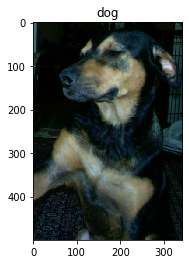

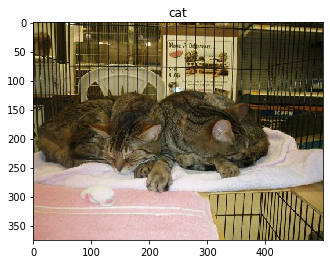

In [60]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

시각화해보니 사이즈가 서로 다른 것이 거슬린다.  
딥러닝에 쓰려면 shape이 맞아야한다. 

사이즈 맞추는 기법은 2가지가 있다. 장단점이 있다. 
1. resize
    - 비율이 깨져서 왜곡되는 문제
2. crop
    - 데이터의 일부가 소실되는 문제
    - 실무에서는 crop 사용
        - 왜곡으로 문제 생기는 것보다 crop하는게 좀 더 낫다


tutorial 코드 중에서 
```python
image = (image/127.5) - 1
```
이 코드는 -1과 1 사이로 normalization하는 기법이다.  
양수만 있을 때 학습이 안되는 경우가 있어서 MinMaxScaling 대신 StandardScaling했다.
무조건 이 방법을 써야하는 것은 아니다. 선택사항이다.

In [63]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

`map`은 python에서도, pandas에서도, tensorflow에서도 끊임없이 나온다.

In [64]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [65]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [66]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

아래 코드는 이번 수업의 최종목표이다.  
이미지넷 데이터 1000만장으로 학습시킨 모델을 코드 한줄로 가져다 쓸 수 있다.  
개인이 이 모델을 만들려면 시간과 돈이 아주 많아야한다.

우리 모델 만들 때 쓰기 위해서 `input_shape`을 알려줘야 한다.  
`including_top`은 기존 모델의 마지막 fc layer를 포함시킬지 여부이다.  
`weights`는 어떤 데이터를 학습시킨 모델의 weights를 쓸 것인지 정한다.  
imagenet은 imagenet 대회용 데이터 1000만장으로 학습한 weight를 쓰겠다는 뜻이다.

In [68]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

`Sequential`은 한 방향으로만 진행된다고 했다.  
MobileNet의 `summary`를 보면 Connected to라는 게 있다.   
레이어들이 한 방향으로만 연결되는 것이 아니라 복잡한 구조로 만들었음을 알 수 있다.

In [69]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

__________________________________________________________________________________________________
block_8_project (Conv2D)        (None, 10, 10, 64)   24576       block_8_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_8_project_BN (BatchNormal (None, 10, 10, 64)   256         block_8_project[0][0]            
__________________________________________________________________________________________________
block_8_add (Add)               (None, 10, 10, 64)   0           block_7_add[0][0]                
                                                                 block_8_project_BN[0][0]         
__________________________________________________________________________________________________
block_9_expand (Conv2D)         (None, 10, 10, 384)  24576       block_8_add[0][0]                
__________________________________________________________________________________________________
block_9_ex

keras는 `application`모듈을 통해서 공개된 성능 좋은 모델을 제공한다.

In [ ]:
# tab 눌러보면 사용가능한 모델이 많다.
from tensorflow.keras.applications import #tab 

모델이 중요할까? 데이터가 중요할까? 데이터가 더 중요하다.

`layers`는 모델의 레이어를 반환한다.  
내가 필요한 레이어를 가져오거나 특정 레이어만 수정할 수 있다. 

In [70]:
base_model.layers

리스트이므로 `len`할 수 있다.

In [71]:
len(base_model.layers)

155

list니까 인덱싱 가능하다

In [74]:
base_model.layers[1]

레이어 하나에도 기능이 많다.

In [81]:
dir(base_model.layers[1])

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_variable_with_custom_getter',
 '_autocast',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_args',
 '_callable_losses',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_collect_input_masks',
 '_compute_dtype',
 '_dedup_weights',
 '_deferred_dependencies',
 '_dtype',
 '_dtype_defaulted_to_floatx',
 '_dtype_policy',
 '_dynamic',
 '_eager_add_metric',
 '_eager_losses',
 '_expects_mask_arg',
 '_expects_training_arg',
 '_flatten',
 '_gather_children_attribute',
 '_gather_saveables_for_checkpoint',
 '_get_call_arg_

특정 레이어를 가져와서 선택적으로 고정시킬 수도 있다. (학습해도 weight가 업데이트되지 않는다.)

In [ ]:
base_model.layers[1].trainable

`weights`는 모델의 weight만 가져온다. tensor로 되어 있고 아주 많다.  
남이 학습한 모델의 weight만 가져오면 내가 학습할 필요 없다.  
구조는 없고 weight만 가져와도 transfer learning할 수 있다.

In [73]:
base_model.weights

[<tf.Variable 'Conv1/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[ 7.51734003e-02,  2.11393330e-02, -8.61470163e-01,
            1.35980397e-01,  9.89127811e-03,  1.42140016e-01,
            6.25003934e-01,  1.50594607e-01,  2.05895714e-02,
            2.81278112e-22, -1.14358437e-21, -2.27494485e-22,
           -3.27495903e-01, -9.08321049e-03,  1.29852386e-03,
            1.84906259e-01,  1.51867405e-01, -1.76067978e-01,
           -1.50455639e-01,  2.06756033e-02,  5.94916864e-23,
            1.41179981e-03,  6.17588401e-01,  3.74927633e-02,
            1.79815572e-02,  2.04572105e-03,  1.29552171e-01,
            6.81161929e-22,  3.64851556e-03, -4.71202396e-02,
           -5.23118713e-21,  3.10034745e-21],
          [ 3.49049985e-01, -6.10829890e-02,  5.23225546e-01,
            2.45421678e-01,  2.46485951e-03, -1.03372492e-01,
            1.03341877e+00,  3.13968539e-01,  1.83513258e-02,
            3.37590639e-22, -1.15860822e-21,  2.21702453e-22,
           -9

출력 중략...

잘 학습된 모델에서 가져온 부분이 바뀌면 안되니까 고정한다. 

In [75]:
base_model.trainable = False

functional paradigm이라서 모델에 괄호를 바로 써서 output 얻을 수 있다.

In [76]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 160, 160, 3])

In [77]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [78]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


원래 mobile net은 1000개 분류할 수 있는 능력이 있다.  
우리는 고양이와 개만 분류할 것이기 때문에 1000개 분류할 수 있는 능력은 필요 없다.  
2개만 분류할 수 있는 fc 레이어를 추가한다.

In [79]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


keras 사용법을 알려주기 위해서 일부러 `Sequential`도 한번 썼다.

In [86]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

뼈대가 만들어진 후에는 `compile`하고, `fit`하고, `evaluate`하고 learning curve를 그려보는 것 똑같다.

In [87]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [90]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps=validation_steps, verbose=2)

20/20 - 9s - loss: 0.4909 - accuracy: 0.7047


In [91]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.49
initial accuracy: 0.70


In [26]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/10
582/582 [==============================] - 16s 27ms/step - loss: 0.3501 - accuracy: 0.8310 - val_loss: 0.1772 - val_accuracy: 0.8964
Epoch 2/10
582/582 [==============================] - 14s 24ms/step - loss: 0.1947 - accuracy: 0.9200 - val_loss: 0.1358 - val_accuracy: 0.9243
Epoch 3/10
582/582 [==============================] - 13s 23ms/step - loss: 0.1623 - accuracy: 0.9320 - val_loss: 0.1295 - val_accuracy: 0.9304
Epoch 4/10
582/582 [==============================] - 13s 22ms/step - loss: 0.1457 - accuracy: 0.9393 - val_loss: 0.1162 - val_accuracy: 0.9368
Epoch 5/10
582/582 [==============================] - 13s 22ms/step - loss: 0.1366 - accuracy: 0.9428 - val_loss: 0.1105 - val_accuracy: 0.9424
Epoch 6/10
582/582 [==============================] - 13s 23ms/step - loss: 0.1343 - accuracy: 0.9429 - val_loss: 0.1065 - val_accuracy: 0.9445
Epoch 7/10
582/582 [==============================] - 14s 24ms/step - loss: 0.1256 - accuracy: 0.9471 - val_loss: 0.1034 - val_accuracy:

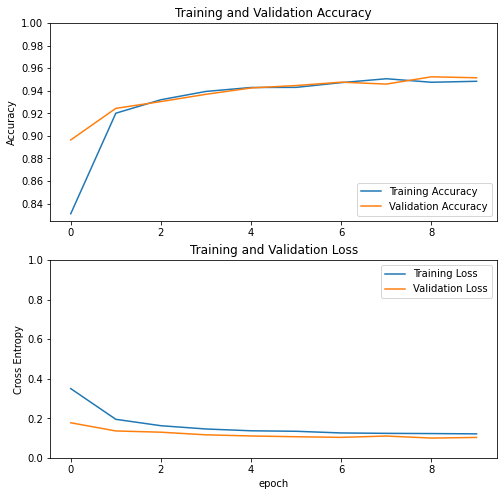

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

---

영상 데이터는 국가에 상관이 없는 것이 특징이다. 그래서 공개된 데이터도 많고 공개된 모델도 많다.  
가져다 쓰기 쉽다.  
  
자연어 데이터는 국가와 상관이 크다. 데이터가 희소하고 서로 공개를 잘 안 한다.  
이 바닥에서 데이터는 곧 돈이다.  
그나마 자연어는 웹에 데이터가 많아서 크로울링으로 해결할 수 있다. 
  
음성 데이터도 국가와 상관이 크고 데이터 공개를 안한다.  
대표저긍로 통신사가 음성 데이터는 가장 많이 보유하고 있지만 공개한 곳은 없다. 